# importing libraries

In [4]:
!pip install tensorflow
!pip install keras

# import image datagenerator library

In [6]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# image data augumentation

In [7]:
train_datagen = ImageDataGenerator(rescale=1./255,
                                   shear_range=0.1,
                                   zoom_range=0.1,
                                   horizontal_flip=True)

In [8]:
val_datagen = ImageDataGenerator(rescale = 1./255)

# loading our data

In [9]:
train_transform = train_datagen.flow_from_directory(r'C:\Users\chink\OneDrive\Desktop\FLASK1\dataset\train_set',
                                            target_size=(128,128),
                                            batch_size=64,
                                            class_mode='categorical')

Found 2527 images belonging to 6 classes.


In [10]:
test_transform = val_datagen.flow_from_directory(r'C:\Users\chink\OneDrive\Desktop\FLASK1\dataset\test_set',
                                            target_size=(128,128),
                                            batch_size=64,
                                            class_mode='categorical')

Found 790 images belonging to 6 classes.


In [11]:
#to define linear initializations import Sequential
from tensorflow.keras.models import Sequential
#To add layers import Dense
from tensorflow.keras.layers import Dense
# to create a convolution kernel import Convolution2D
from tensorflow.keras.layers import Convolution2D
# Adding Max pooling Layer
from tensorflow.keras.layers import MaxPooling2D
# Adding Flatten Layer
from tensorflow.keras.layers import Flatten
from tensorflow.keras.optimizers import Adam

# Initializing the model

In [12]:
model=Sequential()

In [13]:
model.add(Convolution2D(32,(3,3),input_shape=(128,128,3),activation='relu'))
model.add(MaxPooling2D(2,2))

In [14]:
model.add(Convolution2D(64,(3,3),padding='same',activation='relu'))
model.add(MaxPooling2D(pool_size=2))

In [15]:
model.add(Convolution2D(32,(3,3),activation='relu'))
model.add(MaxPooling2D(2,2))

In [16]:
model.add(Convolution2D(32,(3,3), padding='same',activation='relu'))
model.add(MaxPooling2D(pool_size=2)) 

In [17]:
model.add(Flatten()) 

In [18]:
model.output_shape

(None, 1568)

In [19]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 126, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 63, 63, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 63, 63, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 31, 31, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 29, 29, 32)        18464     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 14, 14, 32)       0

# adding hidden layers

In [42]:
# Adding 1st hidden layer
model.add(Dense(kernel_initializer='uniform',activation='relu',units=150))

In [43]:
model.add(Dense(kernel_initializer='uniform',activation='relu',units=68))

In [44]:
model.add(Dense(kernel_initializer='uniform',activation='softmax',units=6))

In [45]:
model.compile(loss='categorical_crossentropy', optimizer=Adam(lr=0.001), metrics=['acc'])

C:\Users\chink\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


# compiling the model

In [28]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['acc'])

In [29]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 126, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 63, 63, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 63, 63, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 31, 31, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 29, 29, 32)        18464     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 14, 14, 32)       0

# fitting the model

In [31]:
res = model.fit_generator(train_transform,steps_per_epoch=2527//64,validation_steps=790//64,epochs=30,
                          validation_data=test_transform)

<ipython-input-31-b0481d1fcebf>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  res = model.fit_generator(train_transform,steps_per_epoch=2527//64,validation_steps=790//64,epochs=30,


Epoch 1/30
39/39 [==============================] - 59s 2s/step - loss: 1.7345 - acc: 0.2302 - val_loss: 1.8188 - val_acc: 0.1693
Epoch 2/30
39/39 [==============================] - 44s 1s/step - loss: 1.7120 - acc: 0.2201 - val_loss: 1.8645 - val_acc: 0.1706
Epoch 3/30
39/39 [==============================] - 43s 1s/step - loss: 1.6725 - acc: 0.2647 - val_loss: 1.6547 - val_acc: 0.2695
Epoch 4/30
39/39 [==============================] - 42s 1s/step - loss: 1.5631 - acc: 0.3264 - val_loss: 1.6641 - val_acc: 0.3021
Epoch 5/30
39/39 [==============================] - 42s 1s/step - loss: 1.5121 - acc: 0.3467 - val_loss: 1.6007 - val_acc: 0.2852
Epoch 6/30
39/39 [==============================] - 43s 1s/step - loss: 1.4980 - acc: 0.3443 - val_loss: 1.5684 - val_acc: 0.2930
Epoch 7/30
39/39 [==============================] - 40s 1s/step - loss: 1.4879 - acc: 0.3431 - val_loss: 1.5757 - val_acc: 0.3346
Epoch 8/30
39/39 [==============================] - 38s 978ms/step - loss: 1.4441 - acc: 0

# saving the model

In [32]:
model.save('gcp1.h5')

# predicting the result

In [33]:
#import numpy library
import numpy as np
#import load_model method to load our saved model
from tensorflow.keras.models import load_model
#import image from keras.preprocessing
from tensorflow.keras.preprocessing import image
#loading our saved model file
model = load_model("gcp1.h5")
img = image.load_img(r"C:\Users\chink\OneDrive\Desktop\FLASK1\dataset\train_set\plastic\plastic1.jpg",
                     target_size=(128,128))

x=image.img_to_array(img) #converting in to array format

x=np.expand_dims(x,axis=0) #changing its dimensions as per our requirement 
#img_data=preprocess_input(x)
#img_data.shape

In [34]:
a=np.argmax(model.predict(x), axis=1)

In [35]:
a

array([3], dtype=int64)

In [36]:
index=['0', '1', '2', '3', '4','5']
result = str(index[a[0]])
result

'3'

In [37]:
train_transform.class_indices

{'cardboard': 0, 'glass': 1, 'metal': 2, 'paper': 3, 'plastic': 4, 'trash': 5}

In [38]:
index1=[ 'cardboard','glass','metal','paper','plastic','trash']
result1=str(index1[a[0]])
result1

'paper'

In [39]:
import matplotlib.pyplot as plt

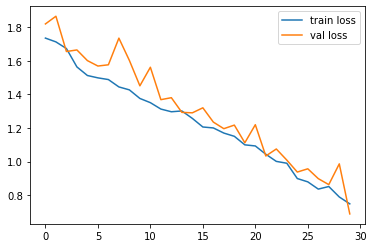

<Figure size 432x288 with 0 Axes>

In [40]:
# plot the loss
plt.plot(res.history['loss'], label='train loss')
plt.plot(res.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

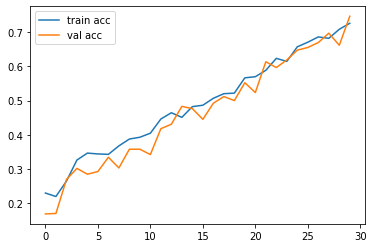

<Figure size 432x288 with 0 Axes>

In [41]:
# plot the accuracy
plt.plot(res.history['acc'], label='train acc')
plt.plot(res.history['val_acc'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')